In [1]:
cd /content/drive/My Drive/medium blogs/Deploying machine Learning Models with StreamLit

/content/drive/My Drive/medium blogs/Deploying machine Learning Models with StreamLit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Extracting Data

In [0]:
data=pd.read_csv('customer_data.csv')

In [4]:
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [5]:
data.isnull().values.any()

True

In [0]:
data.dropna(axis=1,inplace=True)

In [7]:
data.isnull().values.any()

False

In [8]:
data.head()

,label,id,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,2,59000.0,2,11,5,108,4,450081,197.403141


In [0]:
data.drop('id',inplace=True,axis=1)


In [10]:
data.head()

,label,fea_1,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,2,59000.0,2,11,5,108,4,450081,197.403141


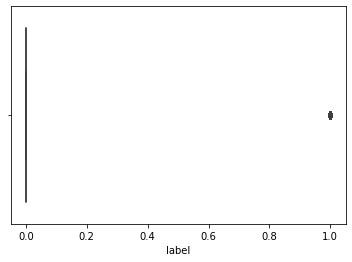

In [11]:
sns.boxplot(data['label'])

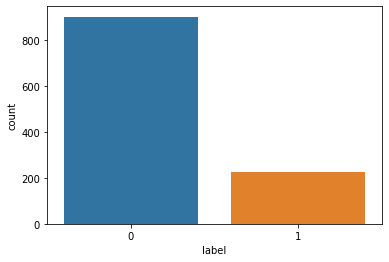

In [12]:
sns.countplot(x='label',data=data)

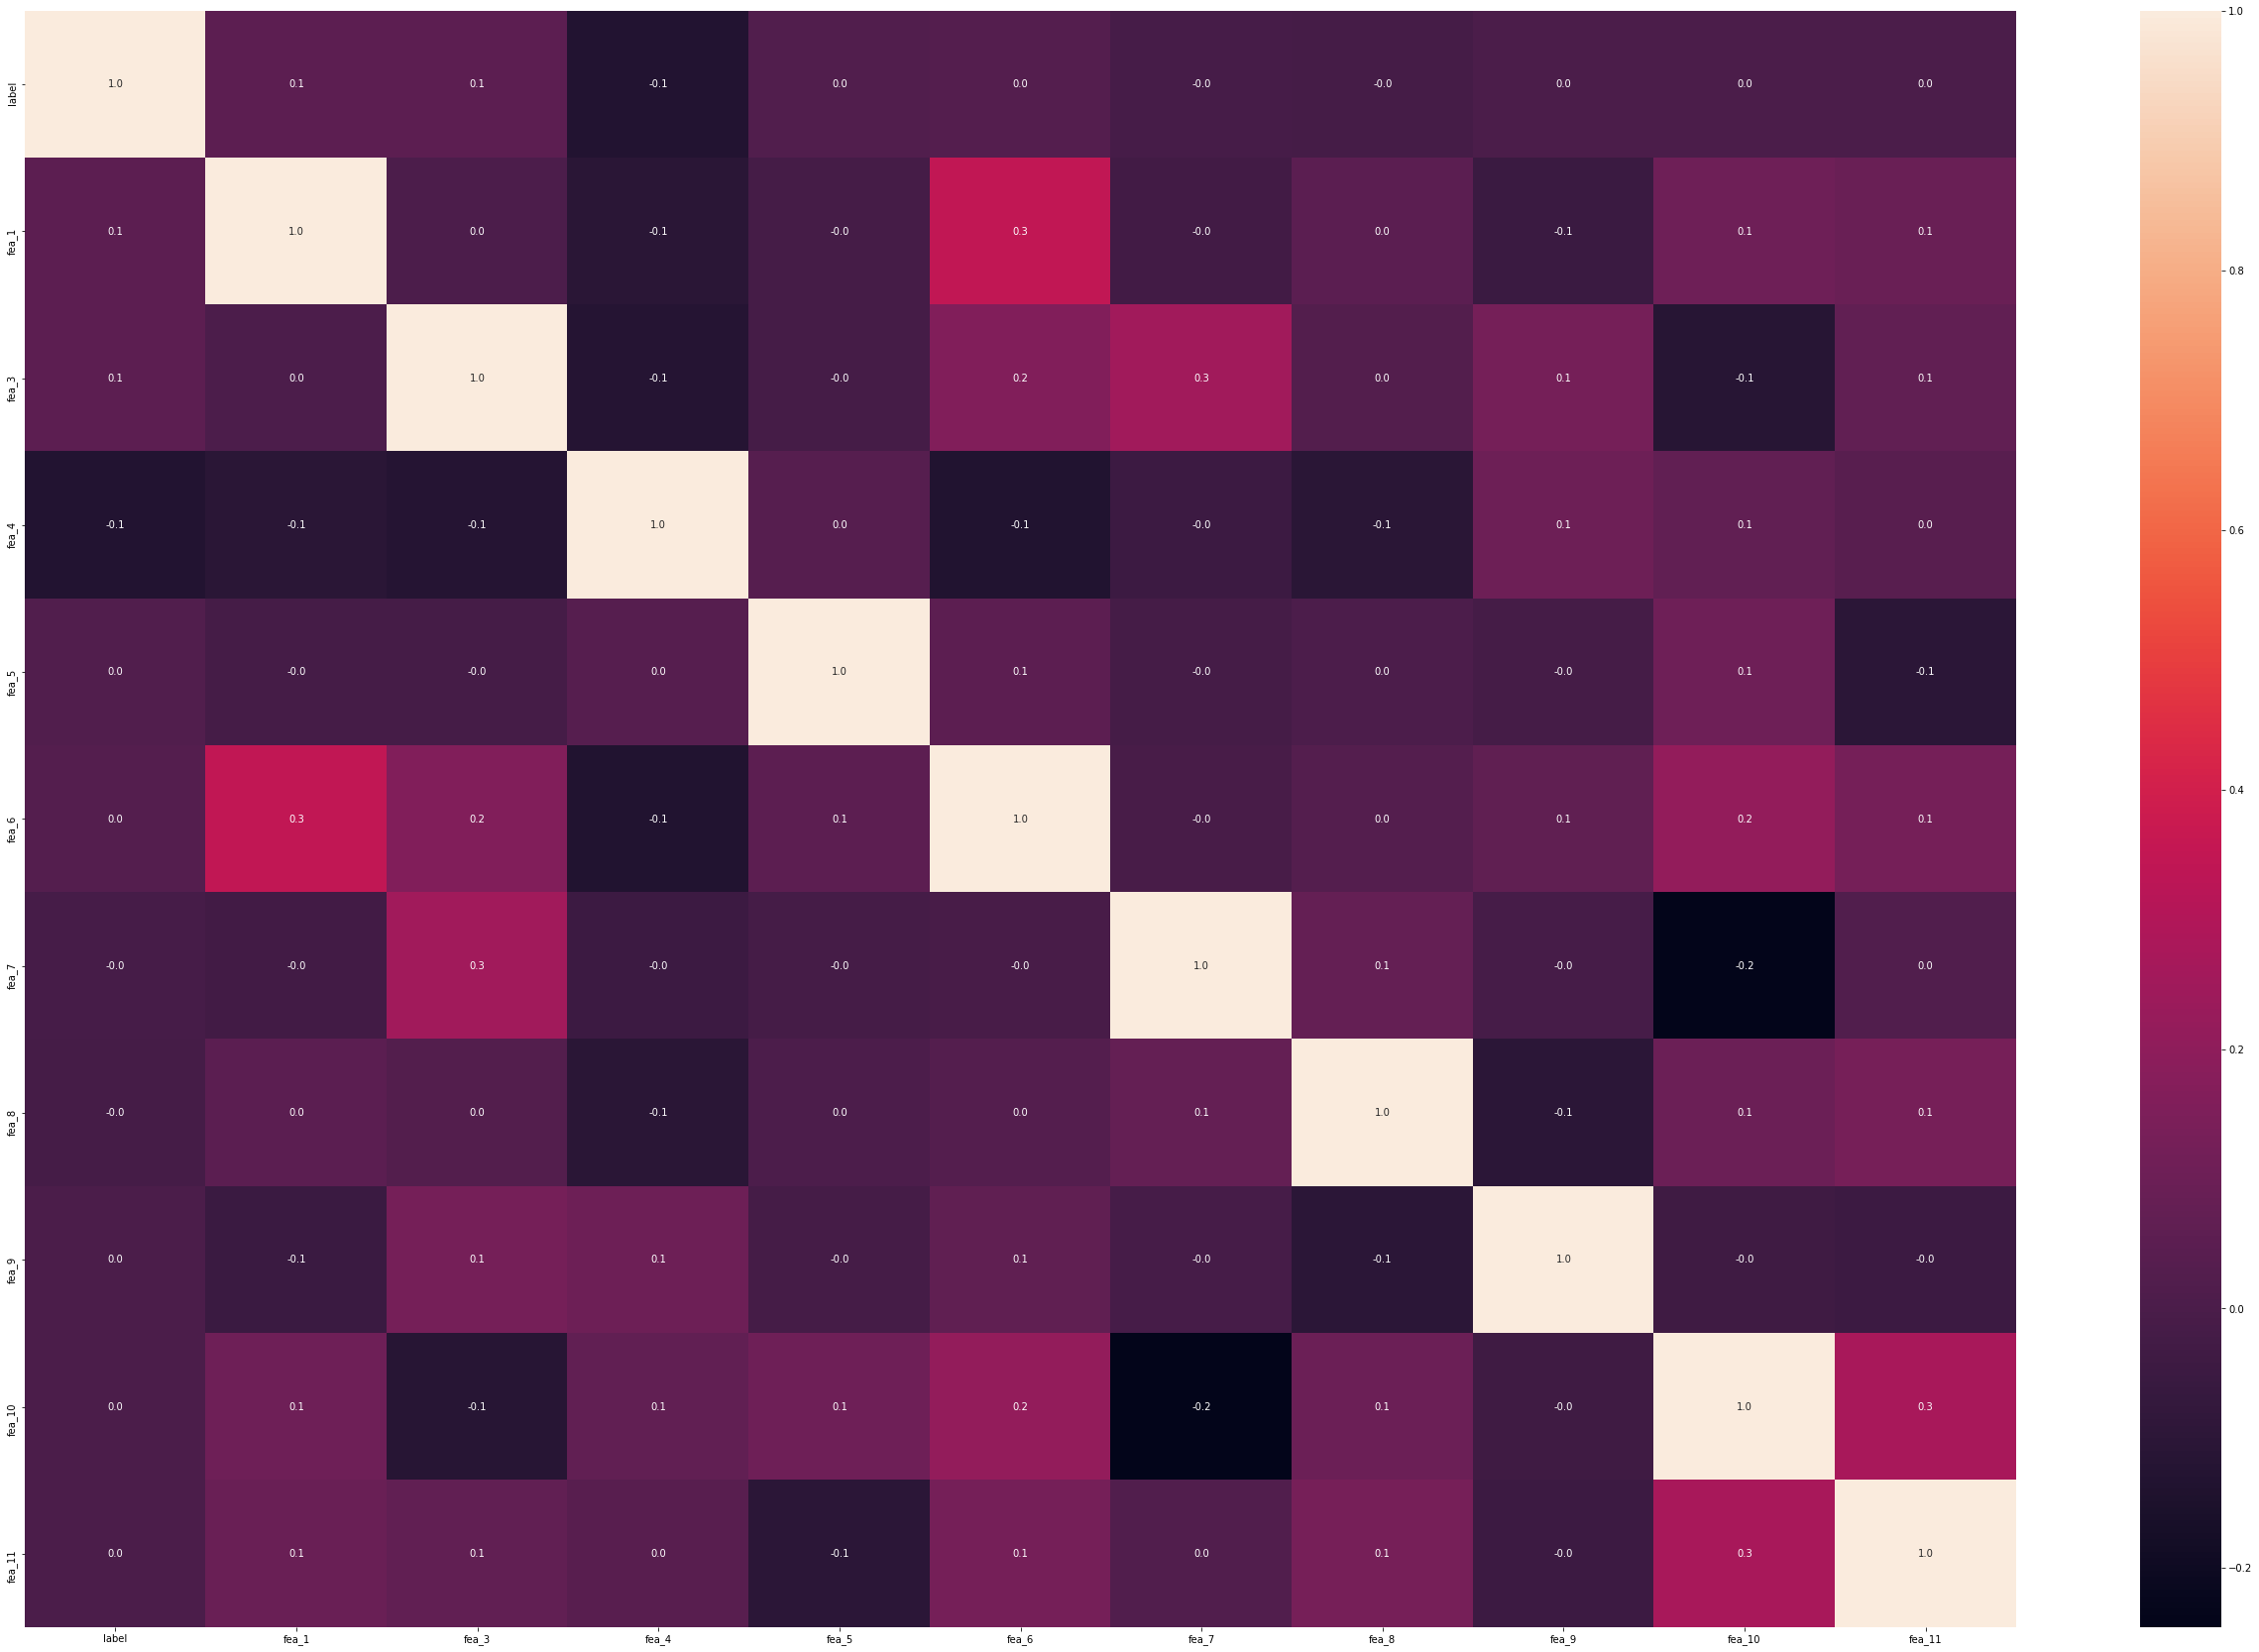

In [13]:
plt.figure(figsize=(45,30))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
data.drop('fea_10',inplace=True,axis=1)
data.drop('fea_6',inplace=True,axis=1)


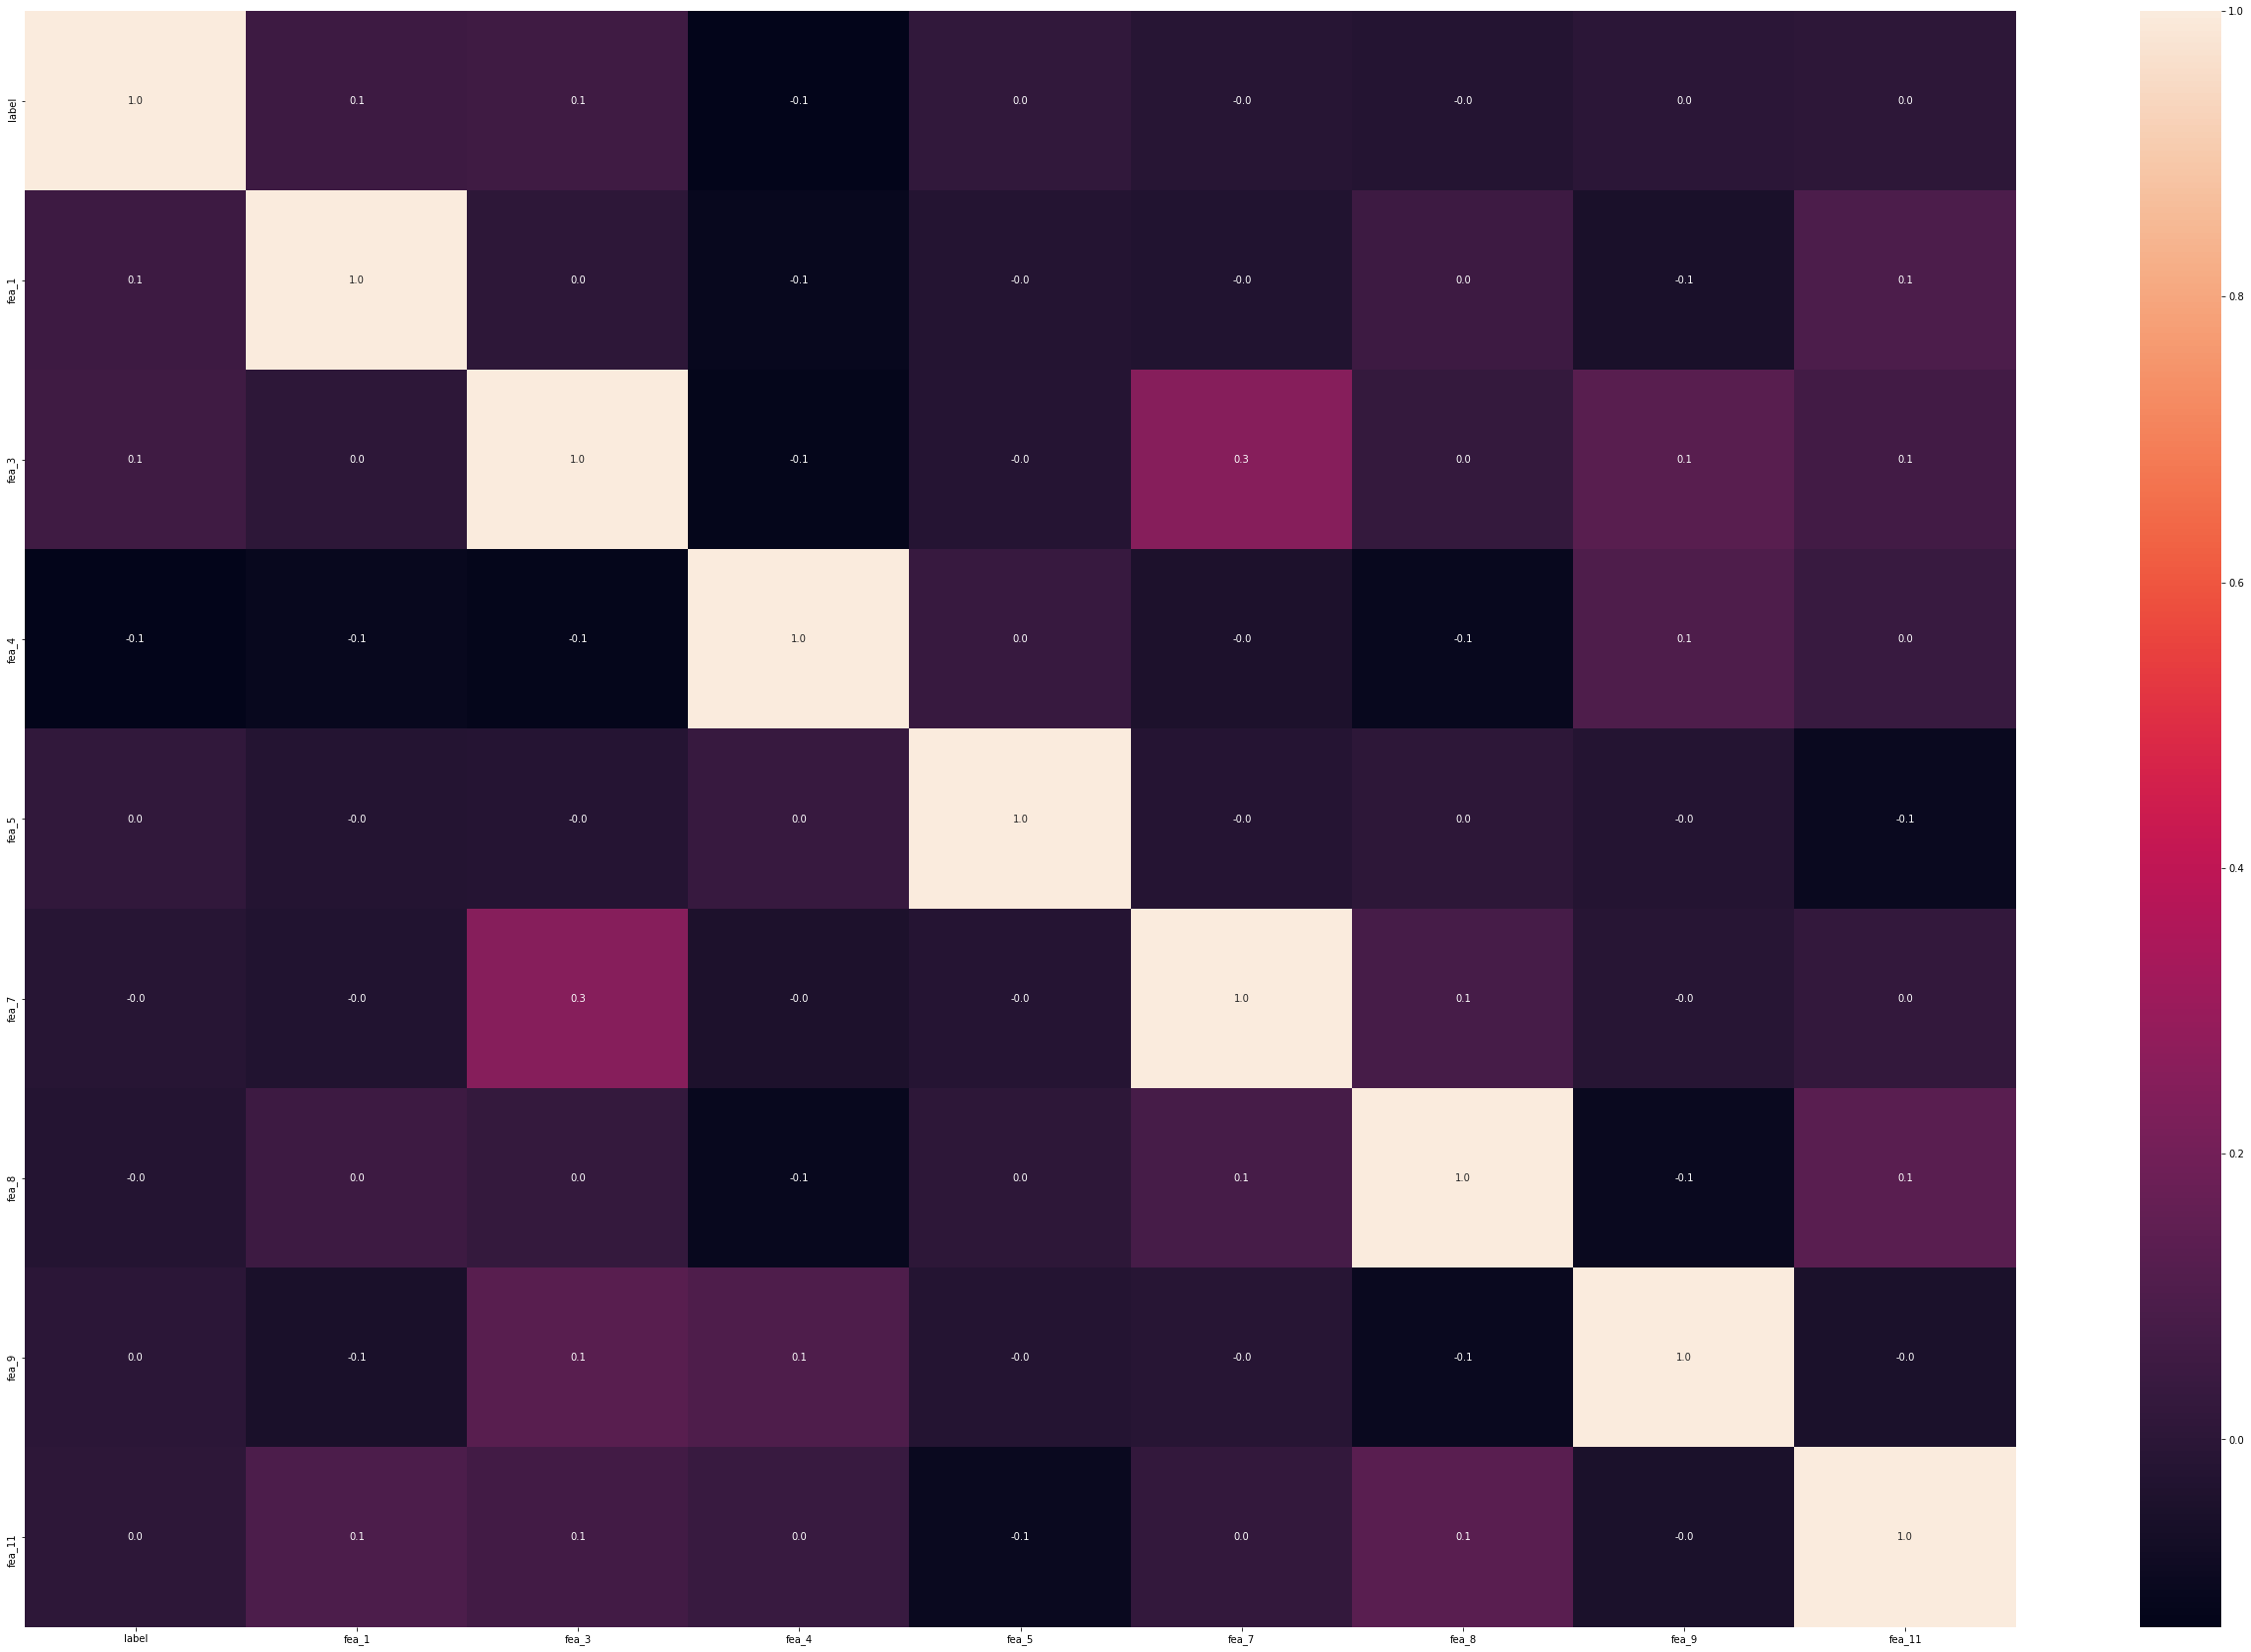

In [15]:
plt.figure(figsize=(45,30))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
features=np.array(data.iloc[:,1:])
labels=np.array(data.iloc[:,[0]])

In [0]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=7)

In [62]:
features_train

array([[5.00000000e+00, 3.00000000e+00, 1.43000000e+05, ...,
        1.10000000e+02, 4.00000000e+00, 1.00000000e+00],
       [4.00000000e+00, 2.00000000e+00, 8.10000000e+04, ...,
        1.10000000e+02, 3.00000000e+00, 1.63526756e+02],
       [5.00000000e+00, 3.00000000e+00, 2.73000000e+05, ...,
        1.08000000e+02, 5.00000000e+00, 2.00000000e+02],
       ...,
       [7.00000000e+00, 1.00000000e+00, 1.87000000e+05, ...,
        1.14000000e+02, 5.00000000e+00, 2.07364414e+02],
       [7.00000000e+00, 3.00000000e+00, 1.62000000e+05, ...,
        1.08000000e+02, 5.00000000e+00, 2.00000000e+02],
       [4.00000000e+00, 2.00000000e+00, 5.70000000e+04, ...,
        1.00000000e+02, 3.00000000e+00, 1.94182904e+02]])

# Modelling

## Logistic Regression

In [19]:
model=LogisticRegression(max_iter=1000)
model.fit(features_train,labels_train)
labels_pred=model.predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
m.accuracy_score(labels_test,labels_pred)

0.8

In [21]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       180
           1       0.00      0.00      0.00        45

    accuracy                           0.80       225
   macro avg       0.40      0.50      0.44       225
weighted avg       0.64      0.80      0.71       225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
labels_test

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [23]:
labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [24]:
print(m.confusion_matrix(labels_test,labels_pred))

[[180   0]
 [ 45   0]]


## SVM

In [0]:
model=SVC(kernel='linear')
model.fit(features_train,labels_train)
labels_pred=model.predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
labels_pred

## KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [27]:
model=GridSearchCV(knn,param_grid=param)
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
model.best_params_

{'n_neighbors': 17}

In [29]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [0]:
labels_pred=model.predict(features_test)

In [31]:
m.accuracy_score(labels_test,labels_pred)

0.8

In [32]:
labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

## RandomForest Classifier

In [0]:
model=RandomForestClassifier()

In [34]:
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
labels_pred=model.predict(features_test)

In [36]:
labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [0]:
labels_test=np.array(labels_test)

In [38]:
m.accuracy_score(labels_test,labels_pred)

0.8044444444444444

In [39]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       180
           1       0.55      0.13      0.21        45

    accuracy                           0.80       225
   macro avg       0.68      0.55      0.55       225
weighted avg       0.76      0.80      0.75       225



In [40]:
print(m.confusion_matrix(labels_test,labels_pred))

[[175   5]
 [ 39   6]]


## Decision Tree

In [0]:
model=DecisionTreeClassifier(max_depth=10)

In [42]:
model.fit(features_train,labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
labels_pred=model.predict(features_test)

In [44]:
labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [45]:
m.accuracy_score(labels_test,labels_pred)

0.7111111111111111

In [46]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       180
           1       0.22      0.18      0.20        45

    accuracy                           0.71       225
   macro avg       0.51      0.51      0.51       225
weighted avg       0.69      0.71      0.70       225



In [47]:
print(m.confusion_matrix(labels_test,labels_pred))

[[152  28]
 [ 37   8]]


## Nueral Network

In [0]:
from keras.utils.np_utils import to_categorical
labels_train=to_categorical(labels_train)
labels_test=to_categorical(labels_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model=Sequential()
model.add(Dense(8,input_shape=[8],activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 34        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(features_train,labels_train,epochs=100,validation_data=(features_test,labels_test))

Train on 900 samples, validate on 225 samples
Epoch 1/100
900/900 [==============================] - 0s 321us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 2/100
900/900 [==============================] - 0s 150us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 3/100
900/900 [==============================] - 0s 147us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 4/100
900/900 [==============================] - 0s 161us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 5/100
900/900 [==============================] - 0s 153us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 6/100
900/900 [==============================] - 0s 153us/step - loss: 3.0758 - accuracy: 0.8000 - val_loss: 3.0674 - val_accuracy: 0.8000
Epoch 7/100
900/900 [==============================] - 0s 154us/step - loss: 3.0758 

In [0]:
labels_pred=model.predict(features_test)

In [0]:
labels_pred=[np.argmax(i,axis=0) for i in labels_pred]
labels_test=[np.argmax(i,axis=0) for i in labels_test]

In [70]:
m.accuracy_score(labels_test,labels_pred)

0.8

In [71]:
m.confusion_matrix(labels_test,labels_pred)

array([[180,   0],
       [ 45,   0]])

In [72]:
labels_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

##After Sampling Data

In [0]:
from sklearn.utils import resample

In [0]:
risk=data[data['label']==1]
nonrisk=data[data['label']==0]

In [75]:
nonrisk['label'].value_counts()

0    900
Name: label, dtype: int64

In [76]:

risk['label'].value_counts()

1    225
Name: label, dtype: int64

In [0]:
random_sampling=resample(risk,random_state=42,replace=True,n_samples=len(nonrisk))

In [78]:
random_sampling

,label,fea_1,fea_3,fea_4,fea_5,fea_7,fea_8,fea_9,fea_11
460,1,7,1,102000.0,2,-1,110,4,178.885438
835,1,5,3,58000.0,2,5,112,4,200.000000
404,1,7,3,56000.0,1,5,103,4,158.113883
62,1,7,3,55000.0,2,9,113,4,212.132034
488,1,4,2,45000.0,2,5,111,4,173.205081
...,...,...,...,...,...,...,...,...,...
648,1,7,1,121000.0,2,5,112,4,173.205081
1103,1,7,3,89000.0,2,5,105,5,1.000000
803,1,7,3,64000.0,2,3,82,5,200.000000
38,1,7,3,50000.0,2,5,79,3,1.000000


In [0]:
data=pd.concat([nonrisk,random_sampling])

In [80]:
data

,label,fea_1,fea_3,fea_4,fea_5,fea_7,fea_8,fea_9,fea_11
1,0,4,1,113000.0,2,-1,100,3,207.173840
2,0,7,1,110000.0,2,-1,101,5,1.000000
4,0,7,2,59000.0,2,5,108,4,197.403141
5,0,6,3,56000.0,2,-1,100,3,1.000000
8,0,5,3,218000.0,2,5,112,4,282.842713
...,...,...,...,...,...,...,...,...,...
648,1,7,1,121000.0,2,5,112,4,173.205081
1103,1,7,3,89000.0,2,5,105,5,1.000000
803,1,7,3,64000.0,2,3,82,5,200.000000
38,1,7,3,50000.0,2,5,79,3,1.000000


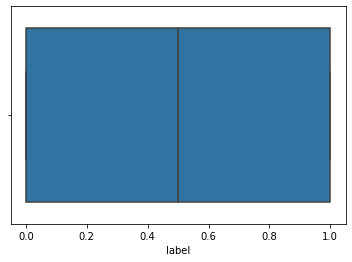

In [81]:
sns.boxplot(data['label'])

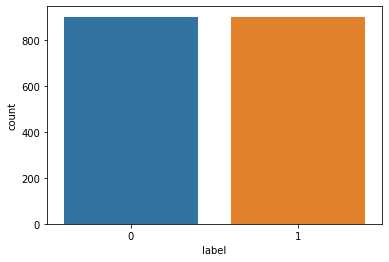

In [82]:
sns.countplot(x='label',data=data)

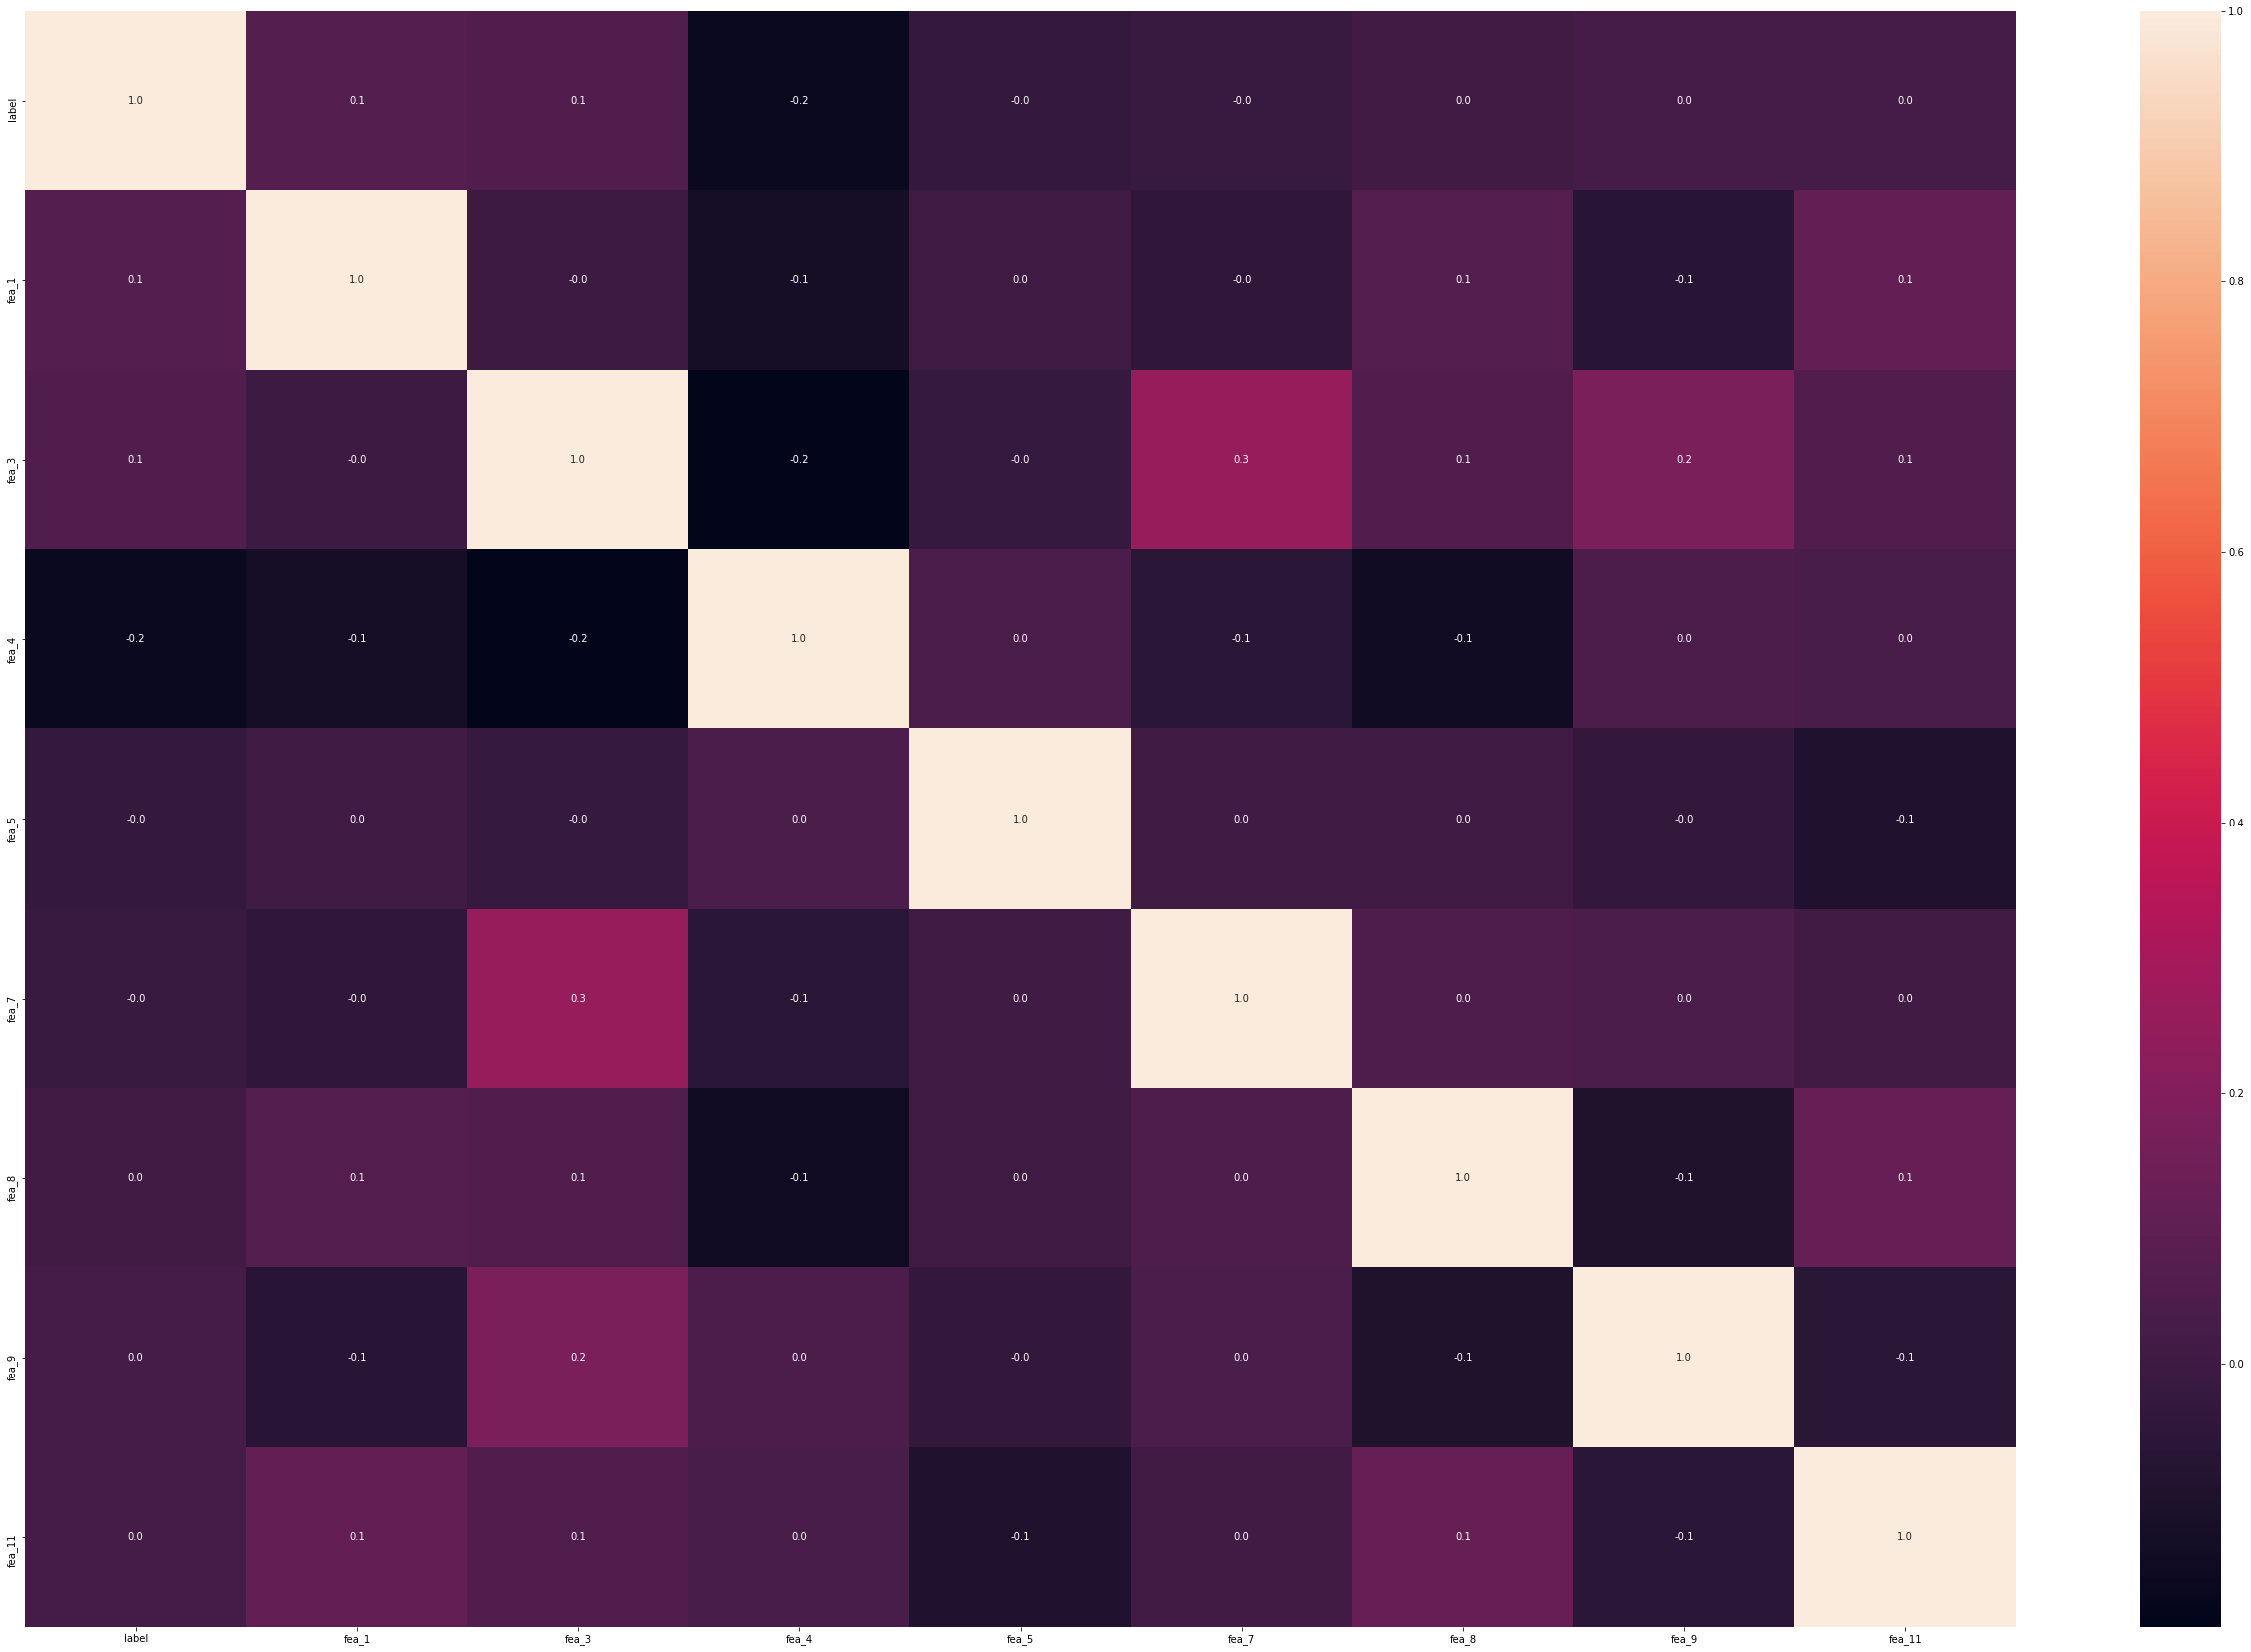

In [83]:
plt.figure(figsize=(45,30))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
features=data.iloc[:,1:]
labels=data.iloc[:,[0]]

In [0]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [132]:
features_train

,fea_1,fea_3,fea_4,fea_5,fea_7,fea_8,fea_9,fea_11
1046,4,2,90000.0,2,5,79,5,173.205081
1051,5,3,157000.0,2,9,111,5,249.799920
334,7,1,135000.0,2,5,87,3,187.082869
1081,7,1,400000.0,2,-1,104,5,492.660126
729,7,3,90000.0,2,5,110,4,212.132034
...,...,...,...,...,...,...,...,...
544,4,3,180000.0,2,5,105,5,1.000000
120,5,3,30000.0,2,5,99,5,1.000000
1082,7,3,162000.0,2,5,113,4,141.421356
390,7,1,134000.0,2,5,95,5,1.000000


# Modelling

## Logistic Regression

In [87]:
model=LogisticRegression(max_iter=1000)
model.fit(features_train,labels_train)
labels_pred=model.predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:

m.accuracy_score(labels_test,labels_pred)

0.5888888888888889

In [89]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       182
           1       0.57      0.66      0.61       178

    accuracy                           0.59       360
   macro avg       0.59      0.59      0.59       360
weighted avg       0.59      0.59      0.59       360



In [90]:
labels_test

,label
535,1
899,1
1091,0
207,0
214,1
...,...
968,0
900,1
0,1
637,1


In [91]:
labels_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [92]:
print(m.confusion_matrix(labels_test,labels_pred))

[[ 94  88]
 [ 60 118]]


## SVM

In [0]:
model=SVC(kernel='linear')
model.fit(features_train,labels_train)
labels_pred=model.predict(features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
labels_pred

In [0]:
m.accuracy_score(labels_test,labels_pred)

In [0]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       182
           1       0.57      0.69      0.62       178

    accuracy                           0.59       360
   macro avg       0.59      0.59      0.58       360
weighted avg       0.59      0.59      0.58       360



In [0]:
labels_test

,label
535,1
899,1
1091,0
207,0
214,1
...,...
968,0
900,1
0,1
637,1


In [0]:
labels_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [0]:
print(m.confusion_matrix(labels_test,labels_pred))

[[ 88  94]
 [ 55 123]]


## KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [94]:
model=GridSearchCV(knn,param_grid=param)
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
model.best_params_

{'n_neighbors': 1}

In [96]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
labels_pred=model.predict(features_test)

In [98]:
m.accuracy_score(labels_test,labels_pred)

0.8722222222222222

In [99]:
labels_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,

## RandomForest Classifier

In [0]:
model=RandomForestClassifier()

In [134]:
model.fit(features_train,labels_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
labels_pred=model.predict(features_test)

In [136]:
labels_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [0]:
labels_test=np.array(labels_test)

In [138]:
m.accuracy_score(labels_test,labels_pred)

0.9138888888888889

In [139]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       182
           1       0.87      0.98      0.92       178

    accuracy                           0.91       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.92      0.91      0.91       360



In [140]:
print(m.confusion_matrix(labels_test,labels_pred))

[[155  27]
 [  4 174]]


In [0]:
import pickle
pickle.dump(model,open('model.pkl','wb+'))

## Decision Tree

In [0]:
model=DecisionTreeClassifier(max_depth=10)

In [109]:
model.fit(features_train,labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
labels_pred=model.predict(features_test)

In [111]:
labels_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [112]:
m.accuracy_score(labels_test,labels_pred)

0.7472222222222222

In [113]:
print(m.classification_report(labels_test,labels_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       182
           1       0.71      0.82      0.76       178

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360



In [114]:
print(m.confusion_matrix(labels_test,labels_pred))

[[123  59]
 [ 32 146]]
